<a href="https://colab.research.google.com/github/cdario79/CustomerSegmentationFinancialServicesCompany/blob/main/Segmentazione_della_clientela_di_un'azienda_di_servizi_finanziari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentazione della clientela per una campagna di marketing di un'azienda di servizi finanziari

L'azienda di servizi finanziari per cui lavori sta investendo in una nuova campagna di marketing per per promuovere la propria linea di carte di credito.

Hai a disposizione un dataset contiene le seguenti informazioni su 9000 possessori di carte di credito dell'azienda:

 - CUST_ID : Identificazione del titolare della carta di credito (Categorico)
 - BALANCE : Importo del saldo rimasto sul conto per effettuare acquisti
 - BALANCE_FREQUENCY : frequenza di aggiornamento del saldo, punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).
 - PURCHASES : Importo totale di acquisti effettuati dal conto
 - ONEOFF_PURCHASES : Importo massimo di acquisti effettuati in un'unica soluzione
 - INSTALLMENTS_PURCHASES : Importo degli acquisti effettuati a rate
 - CASH_ADVANCE : Anticipo in contanti dato dall'utente
 - PURCHASES_FREQUENCY : frequenza degli acquisti, punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - ONEOFF_PURCHASES_FREQUENCY : Quanto frequentemente gli acquisti vengono effettuati in un'unica soluzione (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - PURCHASES_INSTALLMENTS_FREQUENCY : frequenza con cui vengono effettuati gli acquisti a rate (1 = frequentemente, 0 = non frequentemente).
 - CASH_ADVANCE_FREQUENCY : frequenza con cui viene pagato l'anticipo in contanti
 - CASH_ADVANCE_TRX : Numero di transazioni effettuate con "contanti in anticipo".
 - PURCHASES_TRX : Numero di transazioni di acquisto effettuate
 - CREDIT_LIMIT : Limite della carta di credito dell'utente
 - PAYMENTS  : Importo dei pagamenti effettuati dall'utente
 - MINIMUM_PAYMENTS : Importo minimo dei pagamenti effettuati dall'utente
 - PRC_FULL_PAYMENT : Percentuale del pagamento completo pagato dall'utente
 - TENURE : Durata del servizio di carta di credito per l'utente

 Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing.

## Soluzione

## IMPORTAZIONE LIBRERIE UTILIZZATE

In [ ]:
# Standard Libraries
import time  # Import the time module for time-related functions

# Data Manipulation and Analysis
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting graphs
import seaborn as sns  # Import seaborn for statistical data visualization

# Machine Learning - Preprocessing and Imputation
from sklearn.impute import KNNImputer  # Import KNNImputer from sklearn for handling missing data
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from sklearn for feature scaling

# Machine Learning - Clustering
from sklearn.cluster import KMeans  # Import KMeans from sklearn for clustering

# Machine Learning - Evaluation Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score  # Import various clustering metrics

# Machine Learning - Dimensionality Reduction
from sklearn.decomposition import PCA  # Import PCA from sklearn for Principal Component Analysis

## CONFIGURAZIONI

In [ ]:
# Set a random seed for reproducibility of results
RANDOM_SEED = 1

## FUNZIONI UTLIZZATE

In [ ]:
def calculate_metrics(data, max_clusters):

    """
    Calculates various clustering metrics for a given dataset and range of cluster numbers.

    Args:
        data (array-like): Input data to perform clustering.
        max_clusters (int): Maximum number of clusters to consider.

    Returns:
        tuple: A tuple containing lists of inertias, silhouette scores, Davies-Bouldin scores, Calinski-Harabasz scores,
        fit times, best number of clusters, best inertia, best silhouette score, best Davies-Bouldin score,
        and best Calinski-Harabasz score.
    """

    inertias = []  # List to store inertia values
    silhouette_scores = []  # List to store silhouette scores
    db_scores = []  # List to store Davies-Bouldin scores
    ch_scores = []  # List to store Calinski-Harabasz scores
    fit_times = []  # List to store fit times

    for k in range(2, max_clusters + 1):
        start_time = time.time()  # Record start time for fitting

        # Initialize KMeans with current number of clusters and fit the data
        kmeans = KMeans(n_clusters=k, n_init=10, init="k-means++")
        kmeans.fit(data)
        labels = kmeans.labels_

        # Calculate inertia, silhouette score, Davies-Bouldin score, and Calinski-Harabasz score
        inertia = kmeans.inertia_
        sil_score = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)

        end_time = time.time()  # Record end time for fitting
        fit_time = end_time - start_time  # Calculate fitting time

        # Append the calculated metrics to respective lists
        inertias.append(inertia)
        silhouette_scores.append(sil_score)
        db_scores.append(db_score)
        ch_scores.append(ch_score)
        fit_times.append(fit_time)

    # Determine the best number of clusters based on mean silhouette score, mean Davies-Bouldin score,
    # and mean Calinski-Harabasz score
    best_K = np.argmax([np.mean(silhouette_scores), -np.mean(db_scores), np.mean(ch_scores)])
    best_K += 2  # Increment by 2 to match the actual number of clusters
    best_inertia = inertias[best_K - 2]
    best_silhouette = silhouette_scores[best_K - 2]
    best_db = db_scores[best_K - 2]
    best_ch = ch_scores[best_K - 2]

    return inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch

In [ ]:
def plot_metrics(inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch):

    """
    Plot various clustering metrics against the number of clusters and display the best cluster information.

    Args:
        inertias (list): List of inertia values for different numbers of clusters.
        silhouette_scores (list): List of silhouette scores for different numbers of clusters.
        db_scores (list): List of Davies-Bouldin scores for different numbers of clusters.
        ch_scores (list): List of Calinski-Harabasz scores for different numbers of clusters.
        fit_times (list): List of fitting times for different numbers of clusters.
        best_K (int): The best number of clusters based on evaluation metrics.
        best_inertia (float): Inertia corresponding to the best number of clusters.
        best_silhouette (float): Silhouette score corresponding to the best number of clusters.
        best_db (float): Davies-Bouldin index corresponding to the best number of clusters.
        best_ch (float): Calinski Harabasz index corresponding to the best number of clusters.

    Returns:
        None
    """

    # Create a figure and axis object
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Create additional twin axes for overlaying multiple plots on the same figure
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    ax4 = ax1.twinx()

    # Hide axis labels and ticks for additional axes
    ax1.set_ylabel('')
    ax2.set_ylabel('')
    ax4.set_ylabel('')
    ax3.set_ylabel('')

    ax1.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)
    ax2.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)
    ax3.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)
    ax4.tick_params(axis='y', which='both', labelcolor='w', left=False, right=False, labelleft=False, labelright=False)

    # Turn off grid lines for additional axes
    ax1.grid(False)
    ax2.grid(False)
    ax3.grid(False)
    ax4.grid(False)

    # Turn on grid lines for the primary x-axis
    ax1.grid(True, axis="x")

    # Plot each metric against the number of clusters
    ax1.plot(range(2, len(inertias) + 2), inertias, 'r-', label='Inertia', marker="o")
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, 'b-', label='Silhouette Score', marker="o")
    ax3.plot(range(2, len(db_scores) + 2), db_scores, 'g-', label='Davies-Bouldin Index', marker="o")
    ax4.plot(range(2, len(ch_scores) + 2), ch_scores, 'c-', label='Calinski Harabasz Index', marker="o")

    # Set the label for the x-axis
    ax1.set_xlabel('Numero di Clusters')

    # Add legends for each plot
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax3.legend(loc='lower left')
    ax4.legend(loc='lower right')

    # Add a vertical line and text indicating the best number of clusters
    ax1.axvline(x=best_K, color='gray', linestyle='--', label='Miglior K')
    ax1.text(best_K + 0.1, max(inertias), f'K = {best_K}', horizontalalignment='left', verticalalignment='top', color='gray', fontweight='bold')

    # Adjust layout to prevent clipping of labels
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Print the best cluster information
    print()
    print(f'MIGLIORE NUMERO DI CLUSTERS (K): {best_K}\nInertia: {best_inertia:.2f}\nSilhouette Score: {best_silhouette:.2f}\nDavies-Bouldin Index: {best_db:.2f}\nCalinski Harabasz Index: {best_ch:.2f}')

In [ ]:
def show_metrics(data, max_clusters):

    """
    This function calculates clustering metrics for a given dataset and a range of maximum clusters,
    and then displays these metrics in a plot.

    Args:
        data (array-like): Input data to perform clustering.
        max_clusters (int): The maximum number of clusters to consider.

    Returns:
        None
    """

    # Calculate clustering metrics using the calculate_metrics function
    # This function returns various clustering metrics and the best number of clusters
    inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch = calculate_metrics(data, max_clusters)

    # Plot the calculated metrics using the plot_metrics function
    # This function creates a plot displaying the metrics against the number of clusters
    plot_metrics(inertias, silhouette_scores, db_scores, ch_scores, fit_times, best_K, best_inertia, best_silhouette, best_db, best_ch)

In [ ]:
def plot_scatter_pca(X_pca, y_kmeans, centroids):

    """
    Plots a scatter plot of the data points in 2D PCA space with clusters and centroids.

    Args:
        X_pca (array-like): The data points transformed into 2D PCA space.
        y_kmeans (array-like): Cluster labels assigned to each data point.
        centroids (array-like): Coordinates of cluster centroids.

    Returns:
        None
    """

    # Create a new figure with a specified size
    plt.figure(figsize=(15, 10))

    # Iterate over each cluster
    for i in range(K):
        # Scatter plot of data points belonging to the current cluster
        plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], label=f'Cluster {i+1}', edgecolors='white')

    # Scatter plot of cluster centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.7, label='Centroidi')

    # Add legend to the plot
    plt.legend()

    # Display the plot
    plt.show()

In [ ]:
def calculate_clusters_profile(df_final):

    """
    Calculates the clusters profile, including overall mean and mean for each cluster.

    Args:
        df_final (DataFrame): DataFrame containing the data

    Returns:
        DataFrame: DataFrame containing the clusters profile
    """

    # Add the prefix 'Cluster' to the 'CLUSTER' column only if it doesn't already contain 'Cluster'
    df_final['CLUSTER'] = df_final['CLUSTER'].astype(str).apply(lambda x: x if x.startswith('Cluster') else 'Cluster ' + x)

    # Calculate the overall mean from the current DataFrame
    df_profile_overall = pd.DataFrame()
    df_profile_overall['Complessivo'] = df_final.describe().loc[['mean']].T

    # Summarize the mean of each cluster
    df_cluster_summary = df_final.groupby('CLUSTER').describe().T.reset_index().rename(columns={'level_0': 'Nome Colonna', 'level_1': 'Metriche'})
    df_cluster_summary = df_cluster_summary[df_cluster_summary['Metriche'] == 'mean'].set_index('Nome Colonna')
    df_cluster_summary['Metriche'] = 'Media'

    # Combine both DataFrames
    df_profile = df_cluster_summary.join(df_profile_overall).reset_index()

    # Display the resulting DataFrame
    display(df_profile)

In [ ]:
def show_report(df):

    """
    This function generates a comprehensive report summarizing various statistics and characteristics of the DataFrame.

    Args:
        df (DataFrame): Input DataFrame for which the report is generated.

    Returns:
        None
    """

    # Calculate various statistics and characteristics of the DataFrame
    col_type = df.dtypes
    not_null_counts = df.count()
    unique_counts = df.nunique()
    unique_percent = (unique_counts / len(df)) * 100
    missing_counts = df.isnull().sum()
    missing_percent = (missing_counts / len(df)) * 100
    min_values = df.min()
    max_values = df.max()
    zero_counts = (df == 0).sum()
    zero_percent = (zero_counts / len(df)) * 100

    mean_values = pd.Series(dtype='float64')
    median_values = pd.Series(dtype='float64')

    # Calculate mean and median values for numeric columns
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):
            mean_values[column] = df[column].mean()
            median_values[column] = df[column].median()
        else:
            mean_values[column] = np.nan
            median_values[column] = np.nan

    # Create a DataFrame to store the report
    report_df = pd.DataFrame({
        "Tipo di dato": col_type,
        "Valori non nulli": not_null_counts,
        "Valori mancanti": missing_counts,
        "% Valori mancanti": round(missing_percent, 2),
        "Valori unici": unique_counts,
        "% Valori unici": round(unique_percent, 2),
        "Valori zero": zero_counts,
        "% Valori zero": round(zero_percent, 2),
        "Valore minimo": min_values,
        "Valore massimo": max_values,
        "Media": mean_values,
        "Mediana": median_values
    })

    # Get the shape of the DataFrame
    df_shape = df.shape

    # Print the shape of the DataFrame
    print(f'IL DATAFRAME HA {df_shape[0]} RIGHE E {df_shape[1]} COLONNE')
    print()

    # Display the generated report DataFrame
    display(report_df)

In [ ]:
def show_correlation_matrix(df):

    """
    This function displays a correlation matrix heatmap for numeric columns in the DataFrame.

    Args:
        df (DataFrame): Input DataFrame for which the correlation matrix is generated.

    Returns:
        None
    """

    # Select numeric columns from the DataFrame
    df_num = df.select_dtypes(include=np.number)

    # Calculate the correlation matrix
    corr_matrix = df_num.corr()

    # Create a mask to display only the lower triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(14, 10))

    # Plot the correlation matrix heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', linewidths=0.1, cbar=False, annot_kws={"size": 8})

    # Set font size and family for y-axis and x-axis labels
    yticks, ylabels = plt.yticks()
    xticks, xlabels = plt.xticks()
    ax.set_xticklabels(xlabels, size=8, fontfamily='serif')
    ax.set_yticklabels(ylabels, size=8, fontfamily='serif')

    # Turn off grid lines
    ax.grid(False)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout(rect=[0, 0.04, 1, 1.01])

    # Show the plot
    plt.show()

In [ ]:
def plot_distributions(dataframe):

    """
    This function plots the distributions of numeric columns in the DataFrame.

    Args:
        dataframe (DataFrame): Input DataFrame containing numeric columns.

    Returns:
        None
    """

    # Select only numeric columns from the DataFrame
    dataframe = dataframe.select_dtypes(include='number')

    # Calculate the number of rows and columns for subplot layout
    num_cols = dataframe.shape[1]
    num_rows = (num_cols - 1) // 3 + 1  # Divide the number of columns by 3 and round up to get the number of rows

    # Create a figure and axis grid for subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))
    fig.subplots_adjust(hspace=1, wspace=0.5)  # Adjust spacing between subplots

    # Iterate over each numeric column and plot its distribution
    for i, col in enumerate(dataframe.columns):
        row_idx = i // 3  # Calculate the row index for the subplot
        col_idx = i % 3   # Calculate the column index for the subplot
        ax = axes[row_idx, col_idx]  # Select the appropriate axis for the subplot
        dataframe[col].plot(kind='hist', ax=ax)  # Plot histogram of the column on the selected axis
        ax.set_title(col)  # Set the title of the subplot to the column name
        ax.grid(False)  # Turn off grid lines for the subplot

    # If there are empty subplots in the last row, remove them
    if num_rows * 3 > num_cols:
        for i in range(num_cols, num_rows * 3):
            fig.delaxes(axes.flatten()[i])

    # Show the plot
    plt.show()

In [ ]:
def remove_null_value(df):

    """
    Impute missing values in the DataFrame using KNNImputer.

    Args:
        df (DataFrame): Input DataFrame containing missing values.

    Returns:
        DataFrame: DataFrame with missing values imputed using KNNImputer.
    """

    # Find columns with null values
    null_columns = df.columns[df.isnull().any()].tolist()

    # Use KNNImputer to impute missing values
    imputer = KNNImputer()
    df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)

    # Fill remaining missing values in the original DataFrame with imputed values
    df = df.fillna(df_imp)

    return df

## IMPORTAZIONE DEI DATI

In [ ]:
DATASET_URL = "https://raw.githubusercontent.com/cdario79/CustomerSegmentationFinancialServicesCompany/main/credit_card_customers.csv"

In [ ]:
df = pd.read_csv(DATASET_URL)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## ANALISI DEI DATI CARICATI

In [ ]:
show_report(df)

IL DATAFRAME HA 8950 RIGHE E 18 COLONNE



,Tipo di dato,Valori non nulli,Valori mancanti,% Valori mancanti,Valori unici,% Valori unici,Valori zero,% Valori zero,Valore minimo,Valore massimo,Media,Mediana
CUST_ID,object,8950,0,0.00,8950,100.00,0,0.00,C10001,C19190,NaN,NaN
BALANCE,float64,8950,0,0.00,8871,99.12,80,0.89,0.0,19043.13856,1564.474828,873.385231
BALANCE_FREQUENCY,float64,8950,0,0.00,43,0.48,80,0.89,0.0,1.0,0.877271,1.000000
PURCHASES,float64,8950,0,0.00,6203,69.31,2044,22.84,0.0,49039.57,1003.204834,361.280000
ONEOFF_PURCHASES,float64,8950,0,0.00,4014,44.85,4302,48.07,0.0,40761.25,592.437371,38.000000
INSTALLMENTS_PURCHASES,float64,8950,0,0.00,4452,49.74,3916,43.75,0.0,22500.0,411.067645,89.000000
CASH_ADVANCE,float64,8950,0,0.00,4323,48.30,4628,51.71,0.0,47137.21176,978.871112,0.000000
PURCHASES_FREQUENCY,float64,8950,0,0.00,47,0.53,2043,22.83,0.0,1.0,0.490351,0.500000
ONEOFF_PURCHASES_FREQUENCY,float64,8950,0,0.00,47,0.53,4302,48.07,0.0,1.0,0.202458,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,float64,8950,0,0.00,47,0.53,3915,43.74,0.0,1.0,0.364437,0.166667


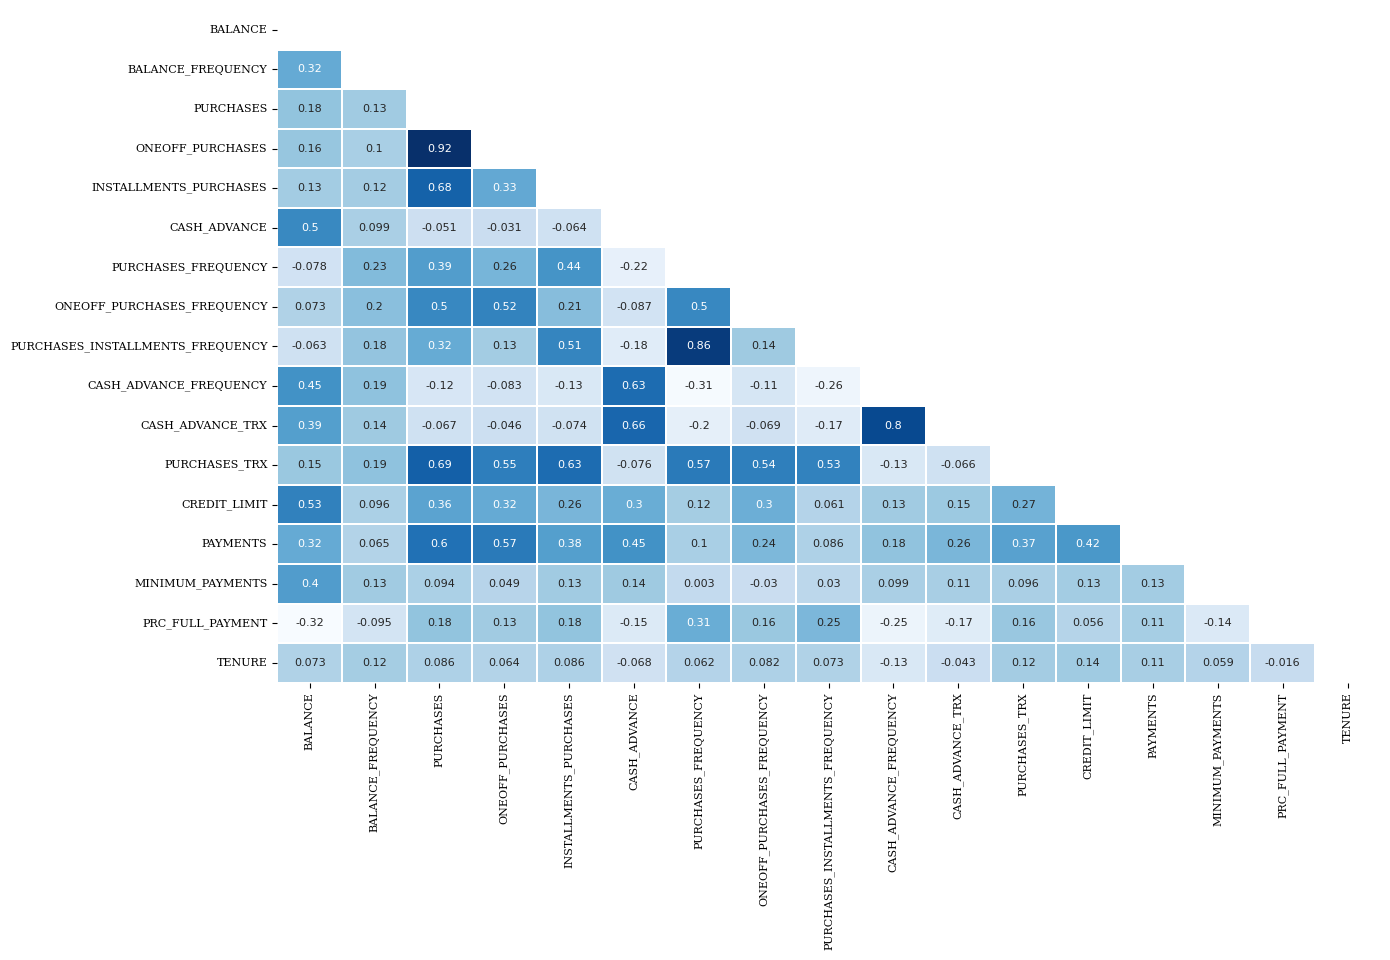

In [ ]:
show_correlation_matrix(df)

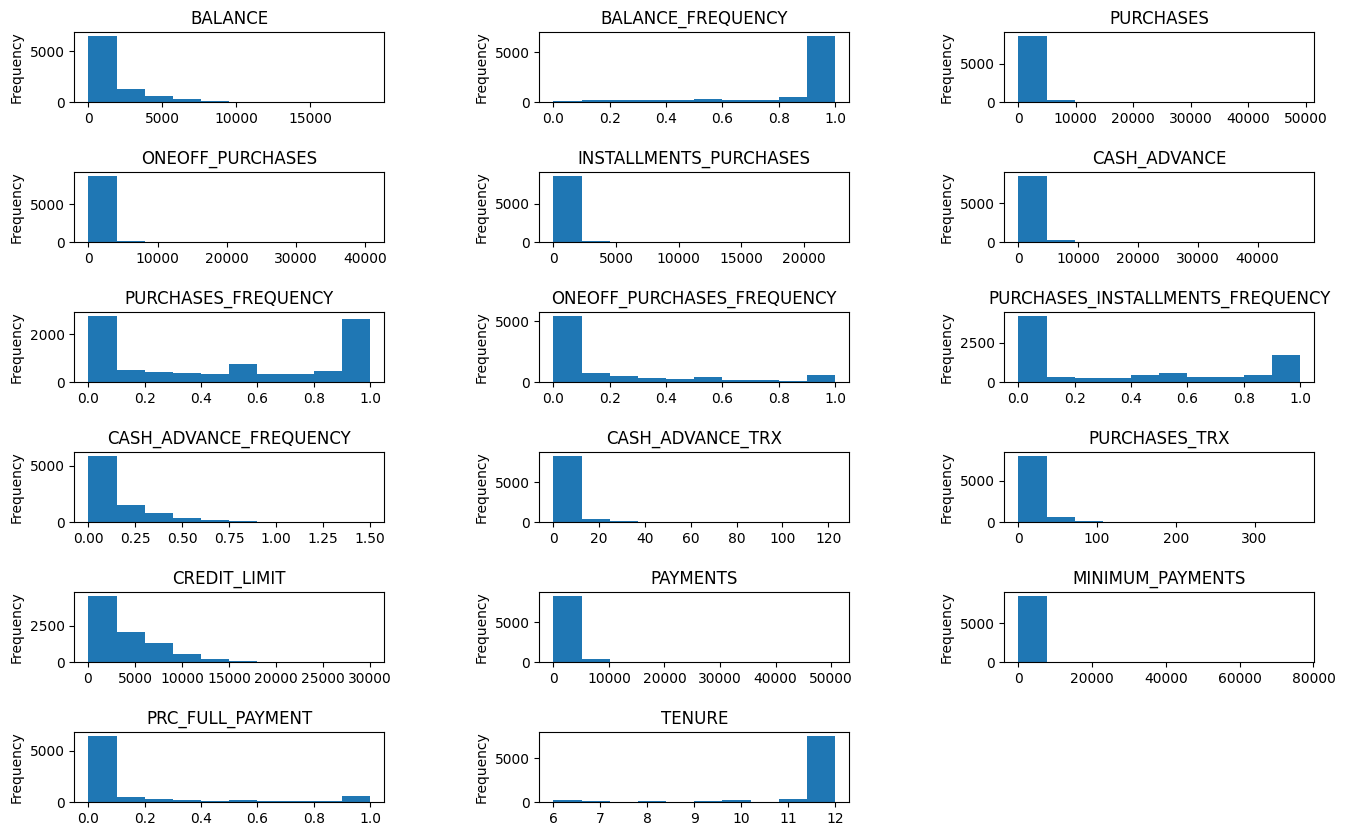

In [ ]:
plot_distributions(df)

Dopo una prima esplorazione dei dati, ho notato quanto segue:

- La colonna CUST_ID funge da identificativo del cliente e verrà eliminata durante la fase di creazione del modello. Pertanto, il numero totale di features disponibili è pari a 17.
- Ci sono valori mancanti in CREDIT_LIMIT (1 valore mancante)
- Ci sono valori mancanti in MINIMUM_PAYMENTS (313 valori mancanti)
- 11 features hanno un elevato numero di valori 0.
- 3 features hanno un basso numero di valori 0.
- 3 features non hanno valori a 0.
- 13 colonne presentano una distribuzione asimmetrica verso destra
- ONEOFF_PURCHASES e PURCHASES sono fortemente correlate (0.92)
- PURCHASES_INSTALLMENTS_FREQUENCY e PURCHASES_FREQUENCY sono fortemente correlate (0.86)
- CASH_ADVANCE_TRX e CASH_ADVANCE_FREQUENCY sono fortemente correlate (0.80)
- Ci sono varie features che hanno una correlazione moderata (>0.50)

Queste osservazioni costituiscono una base per l'analisi dei dati e possono guidare l'ulteriore sviluppo del modello.







## GESTIONE DEI VALORI MANCANTI
Dato che sto per eseguire un'analisi di clustering sui dati, è fondamentale garantire che essi siano completi e coerenti. Per fare ciò, adotterò l'approccio dell'imputazione utilizzando il metodo KNNImputer(). Questo strumento si rivela essenziale nel contesto dell'analisi dei dati mancanti, in quanto ci consente di stimare i valori mancanti basandoci sui dati esistenti, evitando così distorsioni nei risultati del clustering.

KNNImputer() funziona stimando i valori mancanti utilizzando i k vicini più simili nel dataset. Questo significa che anziché eliminare righe o colonne con valori mancanti, come spesso accade con altri metodi di gestione dei dati mancanti, KNNImputer mantiene la struttura complessiva dei dati. In sostanza, preserva le relazioni e le tendenze presenti nei dati originali, consentendo una rappresentazione più accurata del fenomeno che stiamo cercando di modellare.

Una volta completata l'imputazione dei dati mancanti utilizzando KNNImputer(), il risultato verrà salvato in un nuovo dataframe. Questa precauzione è fondamentale per evitare di sovrascrivere i dati originali, che rimarranno intatti per ulteriori analisi o confronti. In questo modo, manteniamo la tracciabilità e la reversibilità delle operazioni svolte sui dati, garantendo al contempo la coerenza e l'integrità delle nostre analisi.

In [ ]:
df_clean = remove_null_value(df)
df_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
show_report(df_clean)

IL DATAFRAME HA 8950 RIGHE E 18 COLONNE



,Tipo di dato,Valori non nulli,Valori mancanti,% Valori mancanti,Valori unici,% Valori unici,Valori zero,% Valori zero,Valore minimo,Valore massimo,Media,Mediana
CUST_ID,object,8950,0,0.0,8950,100.00,0,0.00,C10001,C19190,NaN,NaN
BALANCE,float64,8950,0,0.0,8871,99.12,80,0.89,0.0,19043.13856,1564.474828,873.385231
BALANCE_FREQUENCY,float64,8950,0,0.0,43,0.48,80,0.89,0.0,1.0,0.877271,1.000000
PURCHASES,float64,8950,0,0.0,6203,69.31,2044,22.84,0.0,49039.57,1003.204834,361.280000
ONEOFF_PURCHASES,float64,8950,0,0.0,4014,44.85,4302,48.07,0.0,40761.25,592.437371,38.000000
INSTALLMENTS_PURCHASES,float64,8950,0,0.0,4452,49.74,3916,43.75,0.0,22500.0,411.067645,89.000000
CASH_ADVANCE,float64,8950,0,0.0,4323,48.30,4628,51.71,0.0,47137.21176,978.871112,0.000000
PURCHASES_FREQUENCY,float64,8950,0,0.0,47,0.53,2043,22.83,0.0,1.0,0.490351,0.500000
ONEOFF_PURCHASES_FREQUENCY,float64,8950,0,0.0,47,0.53,4302,48.07,0.0,1.0,0.202458,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,float64,8950,0,0.0,47,0.53,3915,43.74,0.0,1.0,0.364437,0.166667


## RIMOZIONE DELLE COLONNE SUPERFLUE
L'unica colonna da rimuovere è **CUST_ID**.

Salvo poi il risultato in un nuovo dataframe per evitare sovrascrivere i dati originali.

In [ ]:
df_features = df_clean.drop(['CUST_ID'], axis=1)
df_features.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## APPLICAZIONE DELLA STANDARDIZZAZIONE

L'obiettivo primario della standardizzazione è di regolare uniformemente le caratteristiche del dataset in modo che abbiano una scala comune. Ciò è cruciale per evitare che la scala di misurazione o la varianza delle features influenzino in modo eccessivo i risultati del modello che si sta creando.

Standardizzando le caratteristiche, tutte le variabili vengono trasformate in modo che abbiano una media 0 e una deviazione standard 1. Questa pratica migliora il confronto tra le caratteristiche e rafforza la stabilità del modello, portando a previsioni più precise e affidabili.

La standardizzazione è una pratica essenziale per garantire che il modello sia in grado di interpretare correttamente le caratteristiche del dataset, senza essere influenzato dalle differenze nelle scale di misurazione o nella varianza dei dati.

In [ ]:
df_norm = pd.DataFrame(StandardScaler().fit_transform(df_features))
df_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960383,-0.528979,-0.311729,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688676,0.818642,0.087047,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826098,-0.383805,-0.103210,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826098,-0.598688,0.148440,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.266722,-0.525551,0.36068


Converto il dataframe ottenuto dalla standardizzazione in un array numpy per l'utilizzo successivo

In [ ]:
X = np.asarray(df_norm)

## PRINCIPAL COMPONENT ANALYSIS (PCA)

La PCA opera identificando le direzioni lungo le quali i dati variano maggiormente, note come "componenti principali", e proiettando i dati su queste direzioni. Questo processo riduce la complessità del dataset mantenendo al contempo la maggior parte della sua varianza, consentendo di catturare le relazioni essenziali tra le osservazioni.

Applicare la PCA prima di eseguire il clustering offre diversi vantaggi. In primo luogo, riduce il numero di variabili coinvolte nel processo di clustering, il che può migliorare l'efficacia e l'interpretazione dei risultati. In secondo luogo, la riduzione delle dimensioni contribuisce a eliminare il rumore nei dati, concentrandosi sulle informazioni più rilevanti. Infine, la PCA aiuta a ridurre il costo computazionale associato all'analisi, poiché lavorare con un numero inferiore di dimensioni richiede meno risorse di calcolo.

Un approccio comune consiste nel ridurre le dimensioni del dataset a due componenti principali. Questo permette di visualizzare facilmente i risultati del clustering in un piano bidimensionale, consentendo una comprensione più intuitiva delle relazioni tra le osservazioni.

In [ ]:
# Initializing PCA object with 2 components and setting random_state for reproducibility
pca = PCA(n_components=2, random_state=RANDOM_SEED)

# Fitting PCA to the dataset X and transforming the data into the new feature space
X_pca = pca.fit_transform(X)

## RICERCA DEL NUMERO DI CLUSTER DA UTILIZZARE PER IL MODELLO

Per un miglior risultato utilizzerò le quattro metriche per valutare la bontà del clustering e per determinare il numero ottimale di cluster per il mio dataset:

- **Inertia:**
  - L'inertia misura la somma delle distanze quadrate tra ciascun punto dati e il centro del cluster più vicino. Rappresenta quanto i punti di un cluster sono vicini al suo centroide.
  - Per trovare il numero ottimale di cluster, eseguo l'algoritmo di clustering (K-Means) per ciascun numero di cluster e traccio l'inertia per ciascun valore. Il punto in cui l'inertia comincia a diminuire più lentamente (Elbow Point) lo scelgo come il numero ottimale di cluster.

- **Silhouette Score:**
  - Il Silhouette Score valuta la coesione all'interno dei cluster e la separazione tra i cluster. Misura quanto ogni punto è simile ai punti nel proprio cluster rispetto ai punti negli altri cluster.
  - Per trovare il numero ottimale di cluster, calcolo il Silhouette Score per ciascun numero di cluster e scelgo il valore massimo come numero ottimale di cluster.

- **Davies-Bouldin Index:**
  - L'indice di Davies-Bouldin valuta la dispersione dei cluster e la loro separazione. Un valore basso indica che i cluster sono compatti e ben separati.
  - Per trovare il numero ottimale di cluster, calcolo l'indice di Davies-Bouldin per ciascun numero di cluster e scelgo il valore minimo come numero ottimale di cluster.

- **Calinski-Harabasz Index:**
  - L'indice di Calinski-Harabasz valuta la dispersione tra cluster rispetto alla dispersione all'interno dei cluster. Valori più alti indicano clustering migliore.
  - Per trovare il numero ottimale di cluster, calcolo l'indice di Calinski-Harabasz per ciascun numero di cluster e scelgo il valore massimo come numero ottimale di cluster.

Per automatizzare questo processo eseguirò un ciclo su un intervallo di valori per il numero di cluster ed eseguirò il calcolo per ciascuna delle metriche sopra menzionate. Quindi, confronto i risultati ottenuti dalle metriche per determinare il numero ottimale di cluster, che sarà il valore che massimizza o minimizza la metrica specifica a seconda del caso (ad esempio, massimizzare Silhouette Score, Calinski-Harabasz Index e minimizzare Davies-Bouldin Index e Inertia).

Una volta identificato il numero ottimale di cluster facendo il confronto tra i risultati ottenuti dalle varie metriche, utilizzerò quel valore per l'algoritmo di clustering.







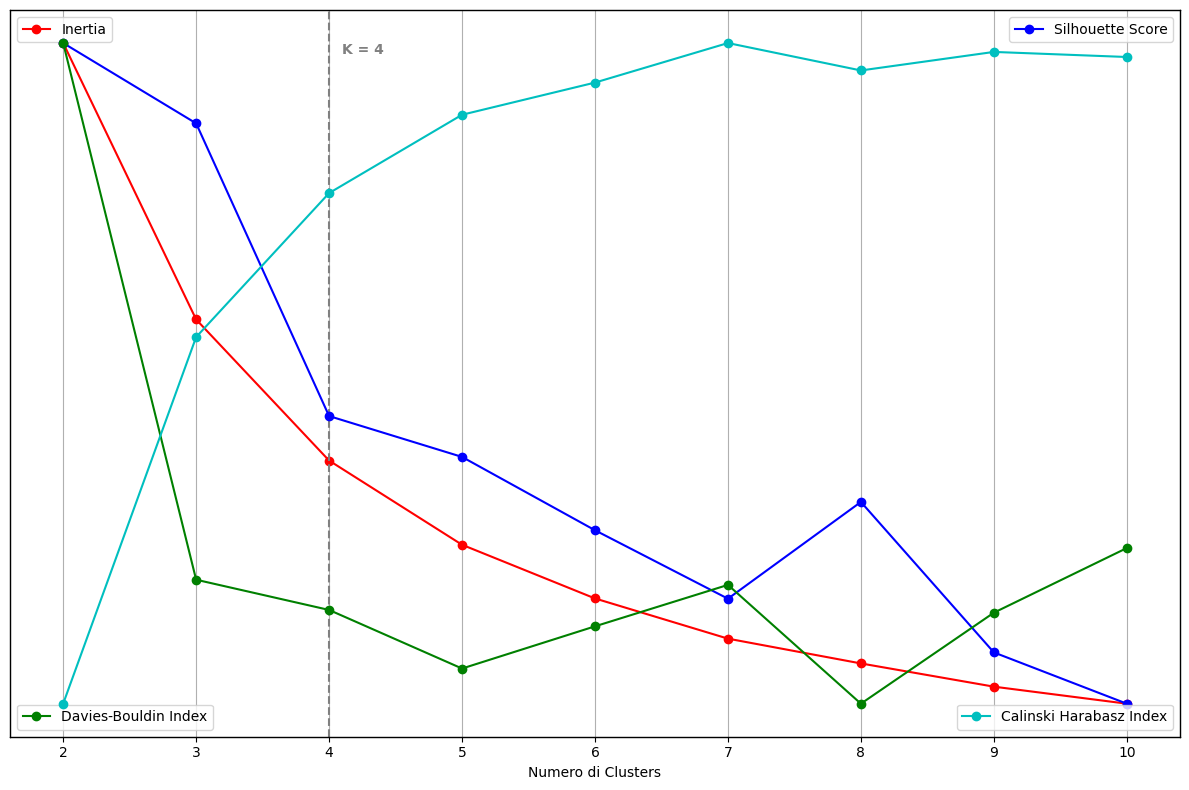


MIGLIORE NUMERO DI CLUSTERS (K): 4
Inertia: 24518.43
Silhouette Score: 0.41
Davies-Bouldin Index: 0.80
Calinski Harabasz Index: 5823.68


In [ ]:
show_metrics(X_pca,10)

## IMPLEMENTO IL MODELLO

Implemento il modello KMeans, che è un algoritmo di apprendimento automatico non supervisionato utilizzato per la suddivisione dei dati in K cluster. L'algoritmo mira a suddividere i dati in cluster in modo tale che ciascun punto appartenga al cluster con la media più vicina. KMeans richiede come parametro in ingresso il numero di cluster (K), il numero di volte in cui l'algoritmo verrà eseguito con centroidi iniziali diversi (n_init) e il metodo di inizializzazione per i centroidi ('k-means++' seleziona centroidi iniziali per una migliore convergenza). Dopo aver adattato l'algoritmo KMeans ai dati, otteniamo le coordinate dei centri dei cluster (centroidi).

In [ ]:
# Setting the number of clusters
K = 4

# Initializing KMeans clustering algorithm with specified parameters
# n_clusters: Number of clusters to form
# n_init: Number of times the k-means algorithm will be run with different centroid seeds
# init: Method for initialization, 'k-means++' selects initial cluster centers for better convergence
kmeans = KMeans(n_clusters=K, n_init=10, init="k-means++")

# Fitting the KMeans algorithm to the data and obtaining cluster labels for each sample
y_kmeans = kmeans.fit_predict(X_pca)

# Getting the coordinates of cluster centers
centroids = kmeans.cluster_centers_

## VISUALIZZO I CLUSTERS

Creo un grafico a dispersione (scatter plot) nello spazio PCA bidimensionale. Ogni dato viene rappresentato come un punto nel grafico a dispersione, dove i colori dei punti indicano a quale cluster appartengono. I centroidi dei cluster sono rappresentati come punti neri nel grafico.

Questo tipo di visualizzazione è utile per comprendere la distribuzione dei dati nello spazio PCA, nonché per vedere come i cluster sono separati in base alla riduzione dimensionale effettuata tramite PCA.

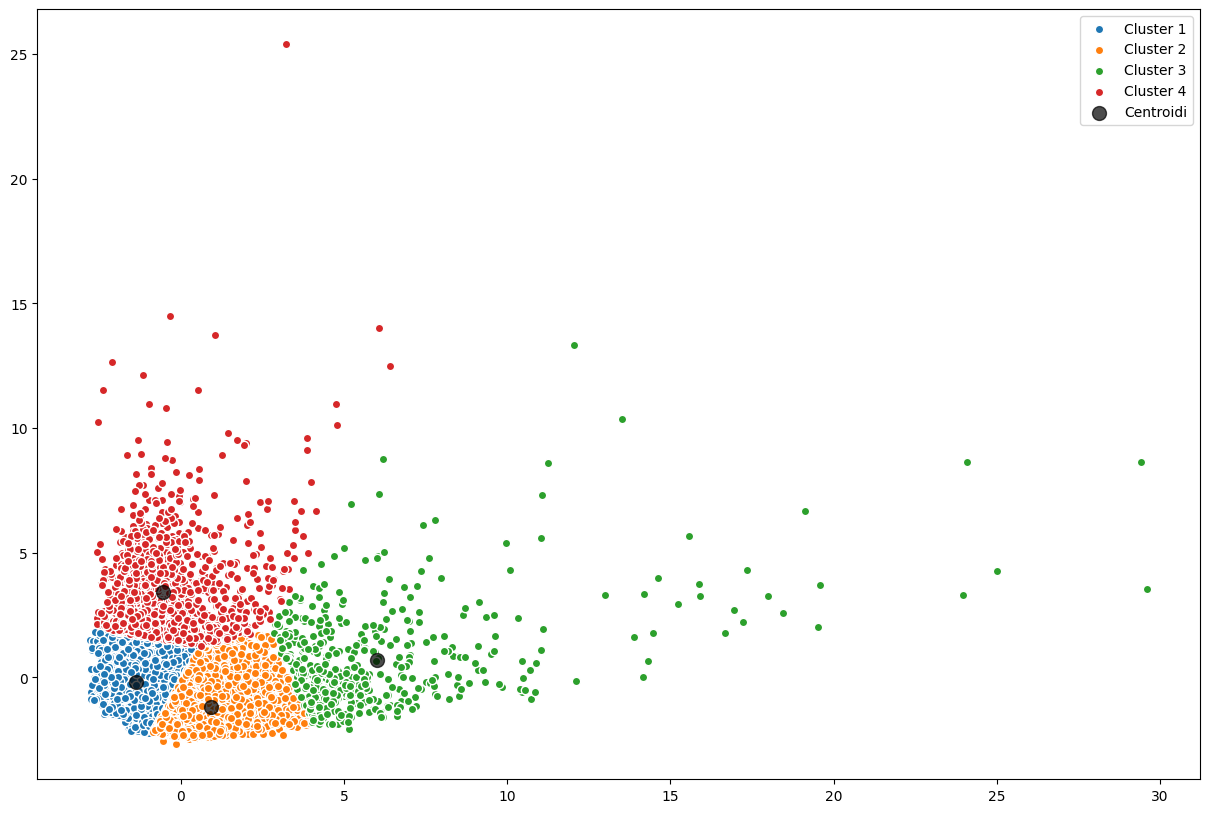

In [ ]:
plot_scatter_pca(X_pca,y_kmeans,centroids)

## CREAZIONE DEL DATASET FINALE
Creo il dataset finale che contiene i dati originali puliti e le relative etichette che identificano per ogni cliente il cluster di appartenenza.

Questo mi servirà per analizzare i risultati e interpretare il significato di ogni cluster.

In [ ]:
df_final = df_clean.copy()

In [ ]:
df_final['CLUSTER'] = y_kmeans+1
df_final.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


## VERIFICA DELLE CARATTERISTICHE DISTINTIVE DI OGNI CLUSTER

Le caratteristiche distintive di ogni cluster sono le features che differenziano un cluster dagli altri. Queste caratteristiche sono utilizzate per interpretare e comprendere meglio la natura dei cluster e per estrarre informazioni significative dai dati.

In [ ]:
calculate_clusters_profile(df_final)

,Nome Colonna,Metriche,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Complessivo
0,BALANCE,Media,1012.915503,824.180354,3401.840056,4510.612798,1564.474828
1,BALANCE_FREQUENCY,Media,0.799792,0.919997,0.988427,0.963486,0.877271
2,PURCHASES,Media,223.081279,1236.499406,6894.613917,462.647357,1003.204834
3,ONEOFF_PURCHASES,Media,157.576608,621.738764,4511.889901,300.127390,592.437371
4,INSTALLMENTS_PURCHASES,Media,65.833785,614.965725,2383.916859,162.619301,411.067645
5,CASH_ADVANCE,Media,614.588758,147.442197,773.154467,4401.478579,978.871112
6,PURCHASES_FREQUENCY,Media,0.190099,0.862440,0.954443,0.266258,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,Media,0.074901,0.301883,0.726667,0.129829,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,Media,0.109962,0.675116,0.808946,0.166187,0.364437
9,CASH_ADVANCE_FREQUENCY,Media,0.122459,0.030698,0.084806,0.470904,0.135144


Considerando i dati visualizzati nella tabella precedente, è possibile identificare le seguenti caratteristiche per ciascun cluster:

- **Cluster 1:** <br/>
Questo gruppo mostra un saldo e una frequenza dei movimenti alti. Gli acquisti effettuati sono relativamente modesti e sporadici. È interessante notare che quando effettuano acquisti, preferiscono pagamenti rateali piuttosto che in un'unica soluzione. Questi clienti sono propensi a utilizzare ampiamente l'anticipo contanti, evidenziato da una quantità significativa di transazioni di questo tipo. Presentano un limite di credito considerevole e tendono a effettuare pagamenti di entità più elevata rispetto a quelli degli altri gruppi.

- **Cluster 2:** <br/>
Questo gruppo si distingue per avere il saldo più basso tra i quattro gruppi, con una frequenza di movimenti inferiore alla media. Gli acquisti effettuati sono piuttosto limitati, con una predominanza di acquisti in un'unica soluzione rispetto a quelli rateali. Questo gruppo mostra un basso utilizzo di anticipo contanti rispetto agli altri gruppi.

- **Cluster 3:** <br/>
Questo gruppo è caratterizzato da un saldo piuttosto contenuto e una frequenza di movimenti molto elevata. Gli acquisti sono mediamente elevati, con una distribuzione significativa tra acquisti in un'unica soluzione e rateali. I clienti di questo gruppo si distinguono per una frequenza di acquisto molto alta e mostrano una tendenza a utilizzare in modo limitato l'anticipo contanti.

- **Cluster 4:** <br/>
Questo è il gruppo con il saldo più alto, dove gli acquisti sono estremamente elevati, sia in termini di acquisti in un'unica soluzione che rateali. Si evidenzia un notevole utilizzo di anticipo contanti, sebbene in proporzione agli acquisti complessivi, l'uso di questo mezzo di pagamento risulti relativamente basso. Presentano un limite di credito molto elevato e sono soliti effettuare pagamenti di entità considerevole.



## SUDDIVISIONE DEI CLIENTI PER TIPOLOGIA

Considerando le caratteristiche distintive di ogni cluster posso definire le seguenti tipologie di clienti:

- **Clienti prudenti o con bassa capacità economica** *(CLUSTER 1)*<br/>
Questo cluster potrebbe rappresentare clienti che gestiscono il loro bilancio con attenzione, cercando di mantenere i saldi bassi e di evitare l'accumulo di debito. Potrebbero essere persone che usano la carta di credito principalmente per emergenze o piccoli acquisti, preferendo pagare in contanti per la maggior parte delle loro spese. Potrebbero essere prudenti nell'evitare gli anticipi in contanti per evitare gli interessi elevati.

- **Clienti che spendono poco con la carta di credito** *(CLUSTER 2)*<br/>
Questo cluster potrebbe includere clienti che utilizzano la carta di credito in modo limitato, preferendo fare principalmente acquisti in contanti o con altri mezzi di pagamento. Potrebbero essere persone che preferiscono risparmiare denaro e limitare il debito, evitando gli acquisti impulsivi e mantenendo i saldi bassi. Potrebbero anche essere clienti che non trovano molto vantaggioso l'utilizzo del credito per le loro esigenze finanziarie.

- **Clienti con uso moderato della carta di credito** *(CLUSTER 3)*<br/>
Questo cluster potrebbe rappresentare clienti che fanno un uso moderato della carta di credito, effettuando regolarmente acquisti sia in un'unica soluzione che rateali. Potrebbero essere persone che preferiscono la comodità e la sicurezza delle carte di credito per i loro acquisti quotidiani, ma che cercano comunque di mantenere il debito sotto controllo. Potrebbero essere più propensi a sfruttare le offerte promozionali e i programmi fedeltà offerti dalle carte di credito.

- **Clienti con uso elevato della carta di credito** *(CLUSTER 4)*<br/>
Questo cluster potrebbe comprendere clienti che fanno un uso estensivo della carta di credito per fare acquisti di alto valore e frequenti. Potrebbero essere persone che amano lo shopping e che non esitano a usare il credito per soddisfare i loro desideri immediati. Potrebbero essere più disposti a prendere in considerazione l anticipo contanti per finanziare i loro acquisti. Potrebbero essere clienti che cercano status e prestigio attraverso il loro potere di spesa.

## SUGGERIMENTI PER LE CAMPAGNE MARKETING

Ecco alcuni suggerimenti di marketing per ciascun gruppo (cluster), considerando i diversi comportamenti finanziari e le caratteristiche dei clienti:

- **Clienti prudenti o con bassa capacità economica** *(CLUSTER 1)*<br/>
  - Fornire strumenti educativi e risorse per aiutare i clienti a gestire meglio il loro denaro, ad esempio guide finanziarie online o consulenze finanziarie gratuite.
  - Promuovere offerte a basso interesse per incoraggiare l'uso della carta di credito per acquisti di emergenza o necessità, evidenziando la flessibilità e la convenienza del credito quando necessario.

- **Clienti che spendono poco con la carta di credito** *(CLUSTER 2)*<br/>
  - Concentrarsi su offerte speciali o programmi di cashback che premiano l'uso della carta di credito per determinate categorie di spesa, ad esempio supermercati o carburante, per incentivare l'utilizzo della carta.
  - Offrire promozioni di iscrizione con bonus di iscrizione o sconti per incoraggiare i clienti a utilizzare la carta di credito per la prima volta.

- **Clienti con uso moderato della carta di credito** *(CLUSTER 3)*<br/>
  - Personalizzare le offerte promozionali in base ai modelli di spesa individuali dei clienti, ad esempio offrire sconti o premi su categorie di acquisto preferite.
  - Lanciare programmi di fedeltà che premiano la frequenza e la varietà degli acquisti, ad esempio accumulando punti bonus per ogni acquisto.

- **Clienti con uso elevato della carta di credito** *(CLUSTER 4)*<br/>
  - Offrire programmi con premi di lusso o esperienze esclusive che attraggono questo segmento di clientela ad alto reddito e ad alto consumo.
  - Creare partnership con marchi di lusso o offrire servizi di concierge premium per aumentare l'attrattiva della carta di credito per questo tipo di clienti.
  - Lanciare campagne pubblicitarie che si concentrano sullo stile di vita di lusso e sull'accesso privilegiato a eventi esclusivi per attrarre e fidelizzare questo segmento di clientela.

## SALVATAGGIO DEL DATAFRAME CLUSTERIZZATO

In [ ]:
# Select only the CUST_ID and CLUSTER columns from the df_final DataFrame
df_save = df_final[['CUST_ID', 'CLUSTER']]
df_save.head()

,CUST_ID,CLUSTER
0,C10001,Cluster 1
1,C10002,Cluster 4
2,C10003,Cluster 2
3,C10004,Cluster 1
4,C10005,Cluster 1


In [ ]:
# Save the filtered DataFrame to an Excel file
df_save.to_excel('credit_card_customers_with_cluster.xlsx', index=False)
print("Il DataFrame salvato nel file 'credit_card_customers_with_cluster.xlsx'")

Il DataFrame salvato nel file 'credit_card_customers_with_cluster.xlsx'
